# 15. modern NLP의 흐름에 올라타보자.
### 변화의 흐름 - Word Embedding과 Context
- Embedding    
NLP task를 풀기 위해 인간의 언어를 컴퓨터의 언어로 바꾸어 주는 작업(필수). 단어가 가지고 있는 의미를 숫자로 녹여내는 tf-idf, word2vec, fasttext 등 다양한 임베딩 방법이 있다. 기존에 배웠던 임베딩 방식은 워드 임베딩(word embedding), 즉 단어 하나나를 임베딩하는 방식이었다. 워드 임베딩은 학습이 완료되면 각 단어 하나하나가 특정 임베딩(벡터)를 가진다. 따라서 단어 사이의 거리를 재고 관계를 파악할 수 있다. 

그렇다면 동음이의어, 다의어 등은 어떻게 표현될까?

__워드 임베딩 방법은 주변 단어를 학습할 때__ 만 고려한다. 다른 모델의 입력으로서 사용될 때(학습된 벡터들을 이용해 input 단어들을 벡터화시킬 때)는 동음이의어, 다의어와 같은 경우는 모두 __고정된 하나의 벡터__ 로 표현하게 되면서 주변 단어들을 고려하지 않는다. 학습할 때는 문맥을 열심히 보지만 테스트할 때는 현재 단어 한 개만 보는 것이다. 

앞으로 등장할 모델들은 __문맥(context)를 잘 반영__ 하는 모델들이다. 

## 15-2. Transfer Learning과 Language Modeling
### Transfer Learning(전이 학습)
전이 학습은 특정 환경에서 학습을 마친 신경망(의 일부 혹은 전부)을 유사하거나 다른 환경에서 사용하는 것이다. 전이 학습을 이용하면 적은 데이터로도 좋은 성능을 얻을 수 있다.

### Language Modeling(언어 모델)
자연어 처리에서의 전이 학습은 보통 Language Modeling(언어 모델)과 관련이 깊다. 언어 모델은 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습한다. 학습을 완료한 언어 모델은 언어의 패턴과 규칙을 학습해 전반적인 언어의 특징을 익힌다. 

자연어 처리에서 __언어 모델이 pretrained model__ 이다. 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이다. 이처럼 주어진 문제(다운스트림 태스크, downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부른다. 

### Transformer
최근 NLP의 큰 흐름은 트랜스포머이다. GPT, BERT 등 후에 만들어지는 모델들이 트랜스포머를 기반으로 했기 때문이다. 

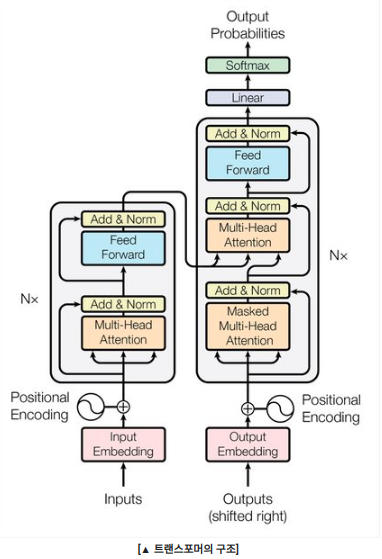

트랜스포머는 Encoder-Decoder 구조로, RNN, LSTM 등을 사용하지 않고 Attention만을 이용한 모델이다. 따라서 LSTM 등 RNN 구조를 사용하지 않지만 번역기를 사용하는 seq2seq 모델과 구조적으로는 동일하다. Encoder-Decoder 모델은 입력부터 출력까지 파이프라인이 이미 고정되어 있어서 이를 이용해 임베딩을 하거나 전이학습을 통해 다른 태스크에 활용하기 어려울 것 같다. 어떻게 transformer 모델이 어떻게 modern NLP의 토대를 이루는 중요한 모델로 발전할 수 있었을까?

## 15-3. ELMo(Embedding from Language Models)
ELMo는 문맥(context)를 반영한 임베딩을 Pretrained model로 구현한 첫 번째 사례이다. 언어 모델을 이용해 임베딩했다. 

### ELMo의 구조
3 가지 요소로 구성 - 1. character-level CNN, 2. bidirectional LSTM, 3. ELMo 레이어

#### 1. character-level CNN
character-level CNN은 입력된 문자들 간의 관계를 파악하고 임베딩 벡터로 변환하는 역할을 한다. ELMo는 character level로 문자를 인식한다. 즉 해당 __character의 유니코드 ID를 입력__ 으로 받는다. 예를 들어, ```밥```이라는 단어를 입력으로 받으면 ```ㅂㅏㅂ```에 해당되는 유니코드는 ```235, 176, 165``` 세 개의 숫자이다.

각각 입력받은 단어의 시작과 끝에 해당하는 스페셜 토큰에 해당하는 유니코드를 앞뒤로 붙이고, 각 유니코드 아이디에 해당하는 행 벡터를 참조하여 붙인다.(look-up table)

만들어진 벡터에 (n x 임베딩 차원 수) 사이즈의 필터로 컨볼루션하여 피처맵을 만들고 max-pooling하여 하나의 값을 뽑아낸다. 이러한 작업을 반복하여 사용자가 원하는 크기만큼의 벡터로 만든다.

여기서 n은 한 번에 몇 개의 문자들을 함께 볼 것인가이다. n이 2라면 ```<BOW> ㅂ, ㅂ ㅏ, ㅏ ㅂ, ㅂ <EOW>``` 이렇게 문자 2개씩 보면서 2개 사이의 관계를 파악하는 CNN이 된다.

ELMo의 original 코드에서는 각기 다른 사이즈를 가진 7개의 필터를 이용하여 2048차원의 벡터를 만든다.

#### 2. bidirectional LSTM

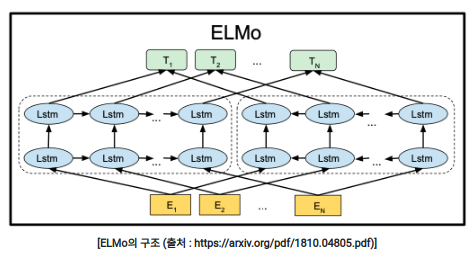

character-level CNN을 통과하여 만들어진 벡터($E_1, E_2, ..., E_N$)들은 bidirectional LSTM을 통과한다. pretrain시에 bidirectional LSTM은 주어진 입력에 다음에 올 단어들을 예측한다.(bidirectional LM이라고도 불림)

bidirectional이라는 것은 양방향으로 학습하는 것이다. 주어진 입력을 한 번은 __순방향__ 으로, 한 번은 __역방향__ 으로 각각 2개의 LSTM layer를 통과한다. 양방향으로 학습하는 것은 모델의 사이즈와 학습에 걸리는 시간이 늘어날 수는 있지만 그만큼 성능이 좋다.

pretrain 시, 순방향과 역방향으로 LSTM을 통과한 히든 벡터들은 이후 softmax(소프트 맥스)를 취해 다음 단어를 예측한다. 이때 ELMo는 순방향과 역방향의 벡터를 합치거나 더하지 않고 각각의 독립적인 모델처럼 행동한다. 하나는 순방향으로, 하나는 역방향으로 진행하다 보니 cheating(다른 방향의 모델에게 정답을 가르쳐 줌)의 가능성이 있기 때문이다.

ELMo는 단어를 하나씩 슬라이딩하여 다음 단어를 예측하면서 문장 내의 단어와 단어들 사이의 관계를 학습한다.

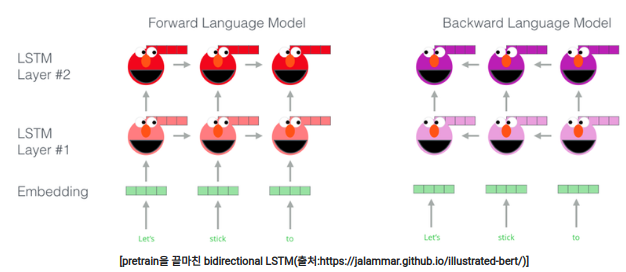

#### 3. ELMO 임베딩 레이어

ELMo 임베딩은 pretrain이 끝나고 finetuning을 하는 과정에서 만들어진다. stick이란 단어의 임베딩을 구한다고 가정하자.

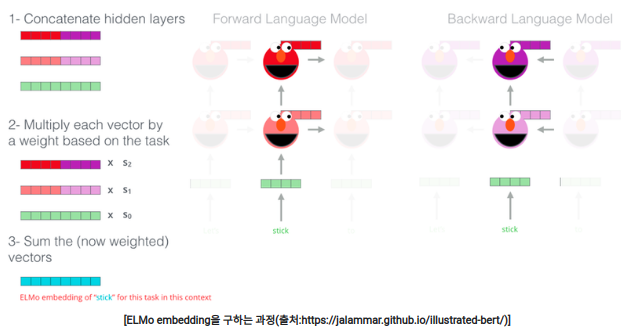

1) 구하고자 하는 토큰에 대한 각 층의 출력값을 모두 가지고 온다. (각 층의 출력값: 임베딩 벡터-character-level CNN을 통과한 후 나온 벡터와 각각의 LSTM layer에서 hidden vector)

2) 각 층 1, 2, ..., l...마다 가중치 $s_1, s_2, ..., s_l, ...$를 곱해서 모두 더해준다. (weighted sum 또는 가중합)

3) 다운스크림 태스그의 가중치 γ를 곱하면 ELMo의 임베딩이 된다. 

가중치 $s_i$와 γ는 다운스트림 태스크 별로 finetuning 시 학습되는 값이다. 정리하자면 __구하고자 하는 토큰에 대한 각 층의 출력값을 가중합__ 한 것이 ELMo 임베딩이다. 

### ELMo의 이용
ELMo 만으로도 임베딩에 이용할 수 있지만, 기존에 학습시켰던 워드임베딩과 같이 사용할 수도 있다.

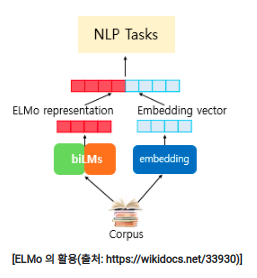

- 논문: [Deep contextualized word representations](https://arxiv.org/abs/1802.05365)

## 15-4. GPT(Generative Pre-Training Transformer)
GPT는 트랜스포머의 decoder를 아주 깊게 쌓아 많은 데이터를 학습시켜 성능을 높인 네트워크이다.

### GPT의 구조

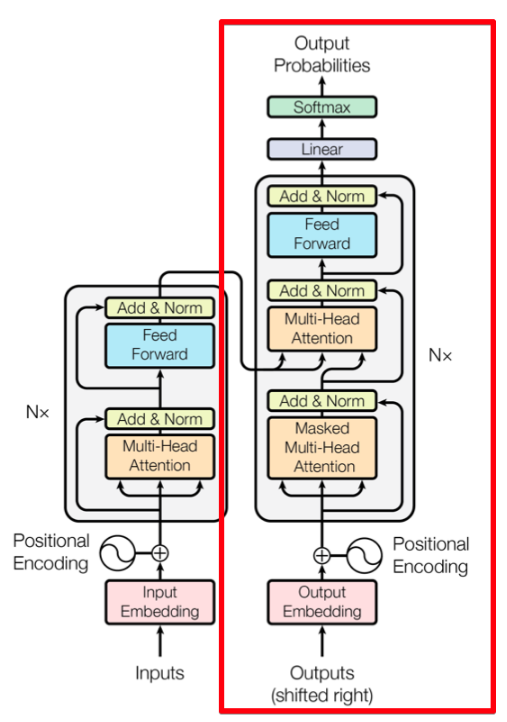

Decoder는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 구성되어 있다. 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면 GPT이다.

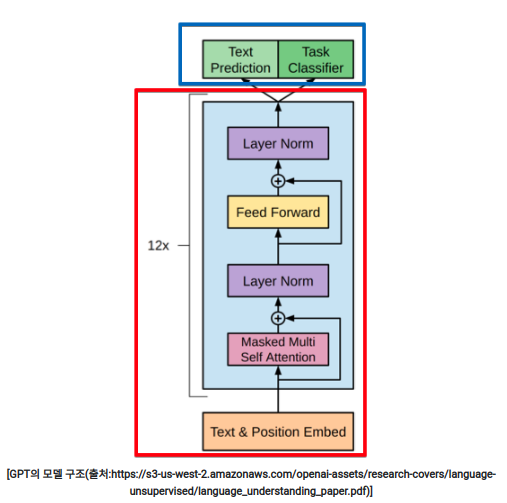

#### Transfomer Decoder Block : Pretraining LM (Unspervised Learning)
빨간색 박스인 pretrain하는 부분으로, 트랜스포머의 decoder 구조를 사용해 unsupervised learning을 한다. 

##### 1. Embedding
GPT는 텍스트의 인코딩으로 __BPE__ (Byte-pair Encoding)을 사용한다. BPE는 모든 단어를 문자(바이트)들의 집합으로 취급해 자주 등장하는 문자 쌍을 합치는 subword tokenization이다. 처음 보는 단어라도 문자(알파벳)의 조합으로 나타내어 OOV 문제를 해결할 수 있는 장점이 있다. 또한 트랜스포에서 사용했던 Position Encoding도 함께 사용한다. 

> GPT의 Text Encoding: BPE(subword tokeninzation) + Position Encoding

##### 2. Masked Multi-Head Attention
Masked Multi-Head Attention은 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기 회귀적인(Autoregressive)인 특성을 부여하기 위해 만든 장치이다. __자기회귀적__ 이란 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고, 그 다음 단어를 예측(Next Token Prediction)하게 하는 형태로 학습되는 형태이다. 정답 문장의 모든 단어를 한 번에 입력받는 트랜스포머의 decoder는 학습할 때 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하다. 

이 구조는 __언어 모델__(비지도 학습을 통해 문장의 자연스러운 순서 학습)과 같은 구조이다. 따라서 GPT는 __문자 생성__ 에 매우 특화되어 있다. 그러나 요약, 텍스트 분류 등 다른 태스크에서도 성능이 좋다. 

#### Text Prediction & Text classification: finetuning downstream task (Supervised Learning)
pretrain이 끝나면 GPT는 downstream task에 맞게 finetuning한다. (파란색 박스) 기존의 모델들과 다르게 __2개의 Objective__ 가 존재한다. 모델이 2 가지의 문제를 동시에 푼다. 즉 text prediction과 text classification을 한 모델에서 동시에 output을 낸다. 

논문의 저자들은 실제 풀어야 하는 문제인 주요 task와 동시에 보조적으로 또 다른 문제를 풀 때(Auxiliary objective) 주요 task에 대한 정확도가 더 올라갔음을 확인했다고 한다. 

(시퀀스의 다음 나올 단어들을 학습하다가 전체적인 언어의 구조를 알게 되는 LM 역시 auxiliary로 얻어진 결과이다.)

- 코드 보기: 자세히 볼 부분은 ```TFGPTMainLayer```라는 전체 모델 클래스 안에서 ```TFBlock``` 레이어 클래스를 반복해서 사용하는 부분. ```TFBlock``` 클래스 안에서 ```TFAttention```, ```TFMLP``` 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있다.

#### Input Transformation

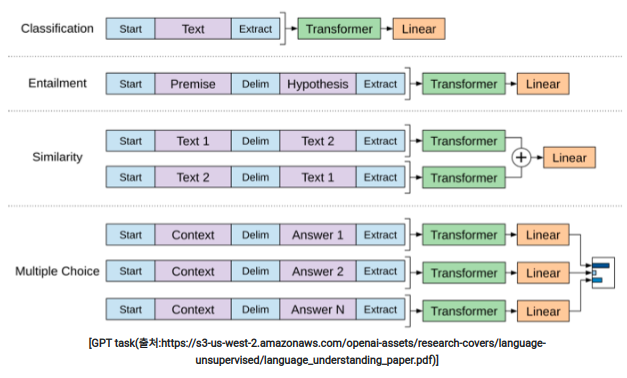

모델이 1개인데 classification, entailment 등 다양한 문제를 풀 수 있는 방법은 __input을 변형__ 시키는 것이다. GPT는 언어 모델이므로 pretrain 시에는 문장(단어의 시퀀스들)이 그대로 input이 된다. finetuning시에도 똑같이 단어의 시퀀스를 주면 되는데, 이때 input을 조금 변형시킨다. 

예를 들어 classification task를 풀기 위해 finetuning하게 되면 ```<start> <input text> <extract> <class>``` 로 구성된 데이터셋을 학습시킨다. GPT는 이 데이터셋에 맞추어 weight를 조정한다. finetuning이 끝나고 테스트 시에는 ```<start> <input text> <extract>```을 input으로 주면 해당 시퀀스에 뒤이어 나올 토큰 즉 ```<class>```를 생성한다. 

#### GPT vs. GPT2
GPT의 모델 구조를 그대로 사용하면서 파라미터의 사이즈를 키우고 성능을 개선시킨 모델이 GPT2이다. 정제된 데이터셋을 더 많이 사용해서 학습시키고 토크나이저를 더 강력하게 만든 것 등의 기법을 사용하였다. 

- 논문    
  - [GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)
  - [GPT-2](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

- 학습이 완료된 GPT를 이용할 수 있는 사이트   
  - [AllenNLP - Demo](https://demo.allennlp.org/next-token-lm?text=AllenNLP%20is)
  - GPT가 확률을 계산해서 확률이 높은 k개의 단어를 생성하는 것을 볼 수 있다.
  
## 15-5. BERT(Bidirectional Encoder Representations from Transformers)
2018년 등장. 

### GPT와 비교

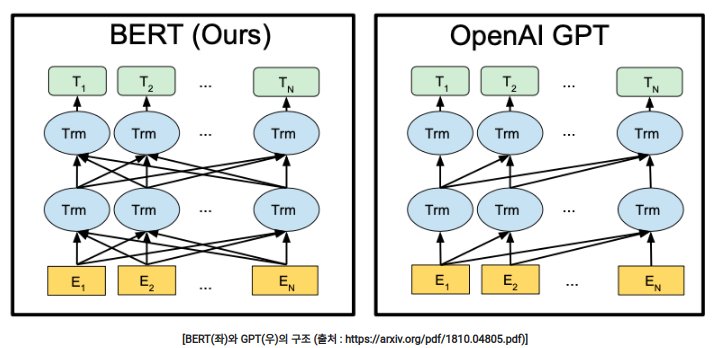

- GPT: 트랜스포머의 decoder를 이용해 만들었기 때문에 input을 한 방향(uni-direction)으로만 보게 된다. 다음 단어를 예측해야 하는 LM의 특징을 가지고 있다. 
- BERT: 양방향(bi-direction)으로 input을 본다. 트랜스포머의 encoder만을 사용한 모델이다. 

### ELMo와 비교

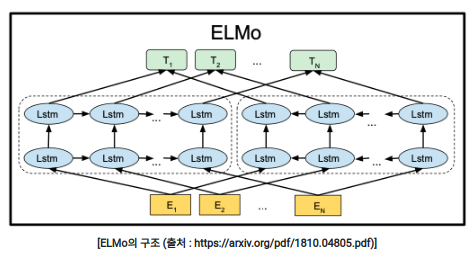

- ELMo: Bidirectio LSTM을 사용했지만 __독립적인 모델처럼 학습__ 하고 마지막 layer에서만 합쳐준다. 따라서 가장 위의 Layer만 양방향 정보를 가지고 있다. 
- BERT: 모든 layer들이 양방향으로 본다.

### 1. BERT의 구조
트랜스포머의 구조를 이용한 모델. 트랜스포머와의 차이점을 위주로 보자.

#### 1. Transformer Encoder Block

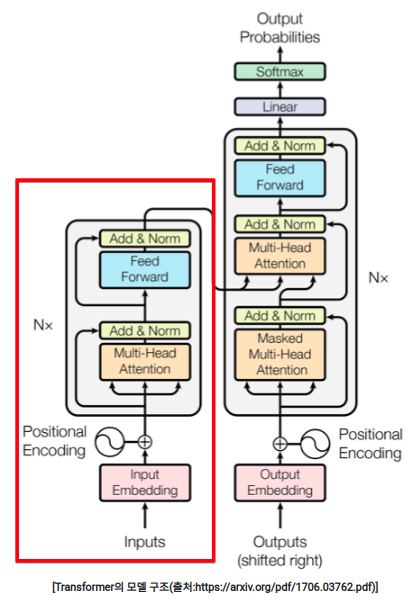

#### 1) Embedding (임베딩)

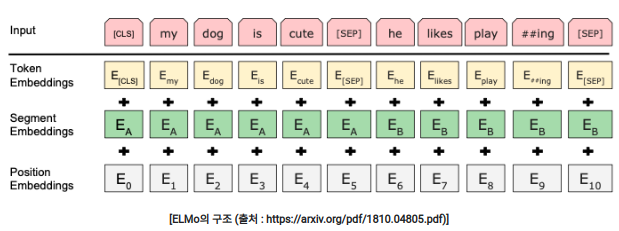

BERT는 트랜스포머와의 다른 임베딩 체계를 가지고 있다. 3개의 임베딩 존재

- Token Embedding      
Wordpiece를 이용해 3만개의 vocabulary를 학습했다. 학습한 Wordpiece model을 이용해 token을 임베딩해준다. 

- Segment Embedding       
두 가지 sentence(텍스트 덩어리의 의미)를 입력으로 받기 때문에 2가지 sentence를 구분해야 한다. 모델의 입장에서 이어진 텍스트들의 덩어리를 segment embedding이 나누어 준다. 그림에서 ```[SEP]``` 토큰으로 구분된 두 sentence에서 앞부분은 A, 뒷부분은 B로 나누어 임베딩하고 있다. 

- Position Embedding         
segment embedding에서 두 sentence를 나누었지만 sentence 안에서의 순서를 모른다. 따라서 position embedding을 통해 문장 내에서 절대적인 위치(순서)를 알려준다. 학습을 통해 position 정보를 습득한다. 

>position encoding    
트랜스포머와 GPT에서 사용. one-hot-encoding처럼 미리 정해진 값을 준다.

위의 3 가지 임베딩을 모두 합산해 BERT의 임베딩이 완성된다. 이후 layer normalization과 dropout까지 해주면 트랜스포머 첫 블록이 완성된다. 

- BERT의 토큰 

    - ```[CLS]``` : sentence의 시작을 알리는 토큰       
    - ```[SEP]``` : sentence의 종결을 알리는 토큰, sentence를 구분하는 데에 사용하기도 함        
    - ```[MASK]```: 마스크 토큰         
    - ```[PAD]``` : 배치 데이터의 길이를 맞춰주기 위한 토큰
    
#### 2. Activation Function(활성화 함수) : GELU
__Feedforward Networks__ 에서 BERT는 ReLU대신 __GELU__ 를 사용한다. 음수 값은 0이 되어버리는 ReLU와는 달리 GELU는 음수에서도 완만한 곡선을 그리기 때문에 미분이 가능하다. GELU를 사용하면 성능이 더욱 좋아지기 때문에 BERT의 저자들은 GELU를 사용했다 한다.

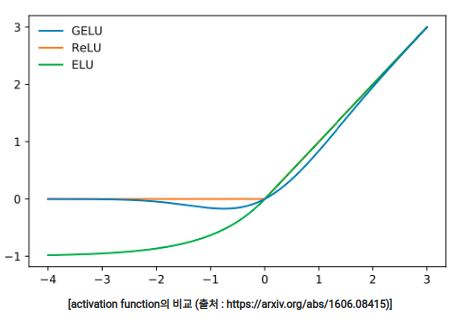

### 2. BERT의 학습
BERT는 양방향(Bi-direction)을 강조한 모델이다. 

#### 1) Masked LM(MLM)
BERT는 마스크된 토큰(```[MASK]```)만 맞추면 되는 Masked LM(MLM)을 제안했다. 따라서 input sequence의 순서에 상관 없이 전체 문장을 모두 볼 수 있다. 

MLM을 위해서 BERT는 학습 데이터의 전체에서 15%를 ```[MASK]``` 토큰으로 랜덤하게 바꾼다. 또한 15%에 해당하는 모든 토큰들 중 80%는 ```[MASK]```토큰, 10%는 무작위로 랜덤한 토큰으로, 나머지 10%는 원래의 토큰을 그대로 사용한다. 

pretrain을 끝낸 모델을 finetuning할 때에는 input에 ```[MASK]```토큰이 등장하지 않기 때문에 ```[MASK]```토큰의 존재 유무가 모델 성능에 영향을 미치게 될 것이라고 생각한 것이다. 따라서 ```[MASK]```토큰이 아닌 것들도 예측을 하도록 학습하여 문장 자체에 대한 전반적인 이해(문맥에 대한 이해)를 할 수 있도록 해주었다.

>전체 학습 데이터의 토큰들 중 12%(15% 중에서 80%)는 ```[MASK]```토큰으로, 1.5%(15% 중에서 10%)는 무작위로 랜덤한 토큰으로 대체하고, 1.5%((15% 중에서 10%)는 변경하지 않고 원래의 토큰을 사용한다.

2) Next Sentence Prediction (NSP)

BERT는 마스크된 토큰을 맞추는 것과 동시에 또 다른 task인 Next Sentence Prediction (NSP, 다음 문장인지 확인하기)를 함께 학습한다. 

> 예시    
여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나
>
>그 사람이 바다의 뚜껑 닫지 않고 돌아가
>
>그때부터 바다의 뚜껑 열린 채 그대로 있네
>
>-하라 마스미 「바다의 뚜껑」 중

한 행을 하나의 sentence라고 가정할 때 두 sentence가 연속해서 오는지 여부를 학습한다. 

```[CLS]```여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 ```[SEP]``` 그 사람이 바다의 뚜껑 닫지 않고 돌아가```[SEP]``` → TRUE(IsNext)

```[CLS]```여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 ```[SEP]``` 한강에서 자전거 타며 아이스아메리카노를 마시고 싶다```[SEP]``` → FALSE(NotNext)

- NSP를 위해 BERT의 학습 데이터는 1건당 2개의 문장으로 구성하고, 50%의 확률로 TRUE와 FALSE를 부여한다.

- max_num_tokens 정의    
task가 너무 쉬워지는 것을 방지하기 위해 max_num_tokens를 정의한 후, 데이터의 90%는 max_num_tokens = max_sequence_length, 10%의 데이터는 max_num_tokens < max_sequence_length이 되도록 랜덤으로 정한다. 이후 두 개의 sentence의 단어 총수가 max_num_tokens보다 작아질 때까지 두 sentence 중 단어 수가 많은 쪽의 문장 맨 앞 또는 맨 뒤 단어를 하나씩 제거한다. 문장 맨 앞의 단어를 선택할지, 맨 뒤의 단어를 선택할지는 50%의 확률로 정한다. 

이렇게 NSP를 학습하면 문장과 문장 사이의 관계를 학습할 수 있다. 문장의 길이를 임의로 조정하면서 짧은 문장에 대해서도 성능이 크게 떨어지지 않게 되며, 문장의 단어들을 랜덤하게 삭제하는 과정을 통해 문장의 일부 단어들이 없어져도 큰 영향을 받지 않는다. 

MLM과 NSP는 동시에 학습된다. 따라서 실제 BERT의 학습 데이터셋은 아래와 같은 구조일 것이다. (편의를 위해 토큰을 띄어쓰기 단위로 나누었다.)

>```[CLS]```여름의 마지막 ```[MASK]``` 누가 제일 늦게 ```[MASK]``` 나왔나 ```[SEP]``` 그 사람이 바다의 ```[MASK]``` 닫지 않고 돌아가```[SEP]``` → Label : TRUE(IsNext)
>
>```[CLS]```여름의 ```[MASK]``` 해수욕 누가 제일 늦게 바다에서 나왔나 ```[SEP]``` 한강에서 ```[MASK]``` 아이스 아메리카노를 마시고 싶다```[SEP]``` → Label : FALSE(NotNext)

### 3. Fine-tuning Task
BERT는 한 모델이 다양한 task를 수행하므로 input transformation을 이용한다.

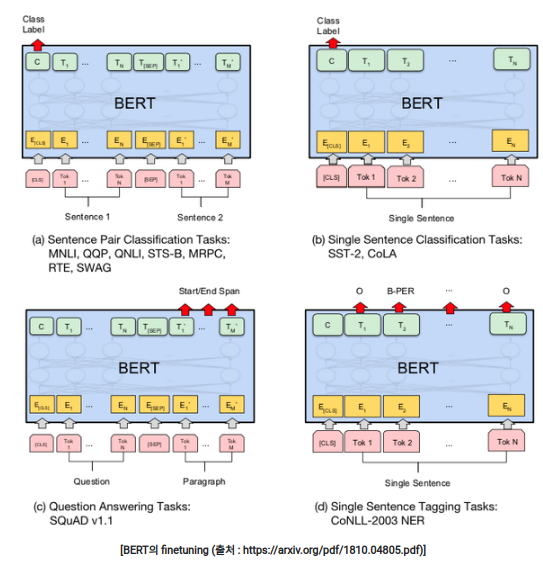

classification 같은 경우는 ```[CLS]```토큰을, QA와 같이 문장이나 단어들이 나와야 하는 경우에는 토큰들의 벡터를 output layer에 넣어 output을 산출해냅니다.

### 4. BERT의 모델 코드
Transformer, GPT와 다른 부분을 유심히 보면서 모델을 훑어보자. 메인 모델 구조인 TFBertEncoder 안에 반복적으로 사용되고 있는 TFBertLayer 레이어 구성을 자세히 보자. 

- [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)

이후의 볼 모델들은 트랜스포머가 베이스인 모델의 한계점을 어떻게 극복해나가는가에 초점이 있다. 성능이 잘 나오긴 하지만 사실 GPT, BERT와 같은 모델들은 어마어마한 학습 시간과 컴퓨팅 파워가 있어야 가능한 모델들이기 때문이다.

## 15-6. Transformer-XL(Transformer Extra Long)
transformer-XL은 기존의 언어모델과 트랜스포머가 가지고 있던 한계점을 개선한 모델이다.

- 긴 context를 잘 반영하지 못하는 문제    

짧은 문장에서의 context는 잘 학습하지만 sequence가 길어질수록 그 상관관계(long-term dependency)가 점점 떨어진다는 것이 문제이다. transformer-XL은 더 긴 context를 어떻게 담을 것인가에 대해 고민한 모델이다.

### transformer-XL의 구조
먼저 트랜스포머에 대해 context를 중점적으로 보자.

#### 1. Vanilla Transformer LMs

1) 긴 context 단절 문제           
트랜스포머는 max_seq_length가 정해져 있다. 모델이 감당할 수 있을 만큼 텍스트를 잘라서 학습하고, 학습한 이후부터 다시 일정 길이만큼 잘라서 학습한다. 이 때 이전 segment에서 학습했던 context는 무시되고, 지금 학습을 하고 있는 segment 안에서만 context를 고려한다. 즉 segment1과 segment2는 전혀 공유하는 context가 없이 단절된다(context fragmentation).

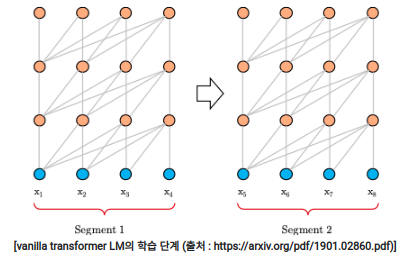

2) 슬라이딩 하면서 단어를 예측할 때 드는 비싼 비용    
모델은 일정 길이의 context를 보고 한 단어를 예측한 후, 딱 한 개만큼만 슬라이딩하여 새로운 context를 만들고 다시 연산하여 하나의 단어를 예측한다. 이렇게 하면 이전 context를 조금 유지할 수 있으나 연산에 드는 비용이 매우 많다.

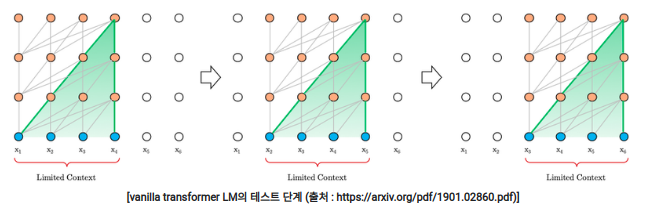

#### 2. Segment-level recurrence with state reuse
이런 문제들을 해결하기 위해 저자들은 __recurrence 메커니즘__ 을 도입한다. 즉 학습 시에 이전 segment에서 계산했었던 hidden state를 사용한다. 이를 통해 context fragmentation을 해결하고 long-term dependency를 유지할 수 있다.

RNN과 비슷해 보이지만 transformer-XL은 다음 layer에서 이전 layer의 hidden state를 재사용한다.

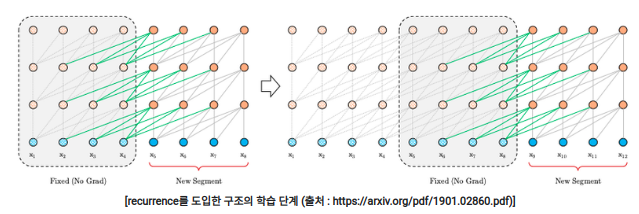

이전 segment들의 정보를 가진 hidden state들의 gradient는 더이상 변하지 않도록 고정을 시킨다.(메모리에 있던 값을 불러온다고 하여 cache라고 부르기도 한다) -> 즉 이전 hidden state는 학습하지 않고 새로운 정보들만 학습시킨다. 

- 테스트 시 가지고 있던 문제도 recurrence 메커니즘으로 해결

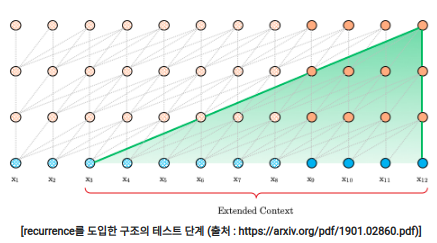

트랜스포머 구조의 LM이 테스트 시 가지고 있던 문제도 recurrence 메커니즘을 이용하면 쉽게 해결 할 수 있다. 이미 계산한 hidden state의 정보를 메모리에 가지고 있다가 cache를 하기 때문에 계속해서 반복하여 똑같은 연산을 할 필요가 없어지고 덕분에 속도도 더욱 빨라진다.

#### 3. Relative Positional Encodings
그러나 트랜스포머에 segment-level의 recurrence 메커니즘을 적용하면 __포지션 정보__ 를 어떻게 추가할 것인가 라는 문제가 생긴다.  

기존 트랜스포머의 포지션 인코딩은 각 segment 내에서의 절대적인 위치 정보를 인코딩한다.

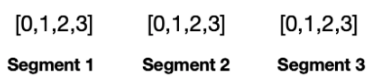

그러나 recurrence 메커니즘을 사용하면 segment 사이에서의 상대적인 위치 정보가 필요하다. 따라서 상대적인 포지션 인코딩(Relative Positional Encodings) 방법이 사용되었다. 기억해야 할 것은 __상대적인 정보__ 를 __attention 연산 시 주입__ 한다는 것이다. 

##### 1) 트랜스포머의 attention 연산

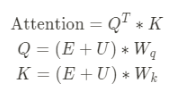 

위는 트랜스포머의 attention 연산의 수식이다. E: 토큰 임베딩, U: 포지션 인코딩. attention 연산에 Q, K를 대입하면 아래와 같은 식이 된다. 

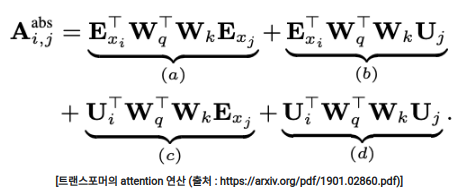

U에 인코딩된 i, j번째 포지션 정보를 가지고 연산을 하는 것과 같다. 그러나 recurrence 메커니즘을 사용하면 상대적인 위치 정보가 필요하다. i, j 값에 상관 없이 j가 i보다 1 뒤에 있다는 것만 알면 된다.

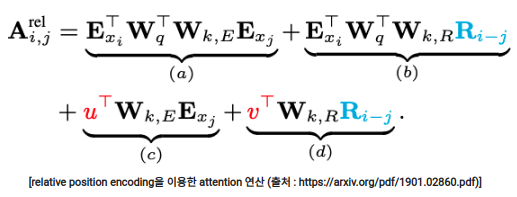

- 상대적인 포지션 정보를 인코딩한 행렬 R 사용        
이를 위해 U 대신 R을 사용한다. R은 상대적인 포지션 정보를 encoding한 매트릭스이다. R의 i번째 행은 i와 다른 단어들 간의 상대적인 포지션을 알려준다. 따라서 아래 첨자 i-j에서 보이듯 i와 j의 상대적인 거리를 사용한다. 여기서 R은 트랜스포머와 마찬가지로 sinusoid encoding matrix를 사용한다. (학습하지 않음)

- 학습 가능한 파라미터인 벡터 u, v 추가     
학습 가능한 파라미터인 벡터 u, v가 추가되었다. 트랜스포머는 query의 위치에 따라 query vector가 영향을 받았다. 그러나 상대적인 포지션 정보를 이용하면서 query는 그 위치에 상관 없이 같은 query vector를 사용한다. 따라서 포지션에 상관 없이 같은 값인 벡터 u, v로 대신하게 되었다. (이 부분의 의미를 모르겠음.)

- $W_{k, E}, W_{k, R}$의 분리
content-based key vectors, location-based key vectory를 독립적으로 만들기 위해 $W_{k, E}, W_{k, R}$를 분리했다.   

-> recurrence 메커니즘과 relative position encoding을 통해 transformer-XL은 auxiliary losses 없이도 뛰어난 성능을 낼 수 있었다고 한다. (auxiliary losses는 googleNet, InceptionNet과 같이 모델이 깊을 경우에 auxiliary classification을 모델 중간에 병렬적으로 달아 구한 loss이다. 이에 대해서는 더 알아보기!)

#### Transformer-XL의 모델 부분의 코드
```TFTransfoXLMainLayer```이라는 메인 클래스 안에서 Transformer-XL의 주요 특징인 __State Reuse__ 를 위한 메모리 관리가 구현된 ```_update_mems()``` 메소드, 그리고 ```TFRelPartialLearnableMultiHeadAttn``` 레이어에 구현된 __Relative attention__ 이 ```TFRelPartialLearnableDecoderLayer``` 안에서 어떻게 recurrent하게 사용되는지를 주의 깊게 보자.

- 논문: [Transformer-XL: Attentive Language Models](https://arxiv.org/pdf/1901.02860.pdf)

## 15-7. XLNET
XLNET은 구글 연구팀에서 발표한 논문으로 우리가 바로 이전 스텝에 다루었던 transformer-XL을 이용한 아키텍처이다. 이 논문에서는 GPT의 AR(AutoRegressive) 언어모델과 BERT의 AE(AutoEncoding) 언어모델과는 다른 퍼뮤테이션(Permutation) 언어모델을 통해 더욱 정교한 언어 모델 성능을 선보인다.

- [XLNET 설명](https://ratsgo.github.io/natural%20language%20processing/2019/09/11/xlnet/)
- 논문: [XLNet: Generalized Autoregressive Pretraining for Language Understanding](https://arxiv.org/abs/1906.08237)

- LM의 큰 흐름   

두 가지 흐름은 AR(auto-regressive)과 AE(auto-encoder)이다. 

AR의 경우 GPT와 같은 일반적인 LM을 의미하며, 한 방향으로 학습한다. 양방향으로 텍스트를 볼 수 없다는 것이 context를 습득하는 데에 있어서 단점이다. 

또 다른 흐름인 AE는 BERT로 대표될 수 있다. AE는 모델에 노이즈를 주고 이를 복원하는 방식으로 학습한다. BERT는 MASK 토큰을 통해 모델의 노이즈를 주었으며, 이를 맞추는 과정에서 학습을 한다. 양뱡향으로 context를 볼 수 있다는 장점이 있지만, pretrain시에 존재하던 MASK토큰이 finetuning과 evaluation 시에 보이지 않아 불일치가 발생한다는 단점이 있다. AE의 더 큰 문제는, MASK토큰들 간의 dependency를 확인할 수 없다는 것이다.

permutation LM을 사용함으로써 XLNET은 AR과 AE의 장점을 동시에 가질 수 있다. AE처럼 양방향 context를 모두 볼 수 있고, AR처럼 예측해야 할 토큰들 간의 dependency를 놓치지 않고 학습할 수 있다.

XLNET는 content stream attention과 query stream attention을 사용한다. content stream attention은 기존의 트랜스포머의 attention과 동일한 attention이다. query stream attention은 현재 토큰의 position 정보만을 이용하는 attention이다. 현재 토큰의 content를 제외시킴으로써 동일한 input으로 다른 ouput을 내야 한다는 permutation LM이 가지는 문제점을 해결한다.

#### 참고 블로그 정리
XLNet은 구글 연구팀(Yang et al., 2019)이 발표한 기법으로 공개 당시 20개 자연어 처리 데이터셋에서 최고 성능을 기록한 아키텍처이다. 일부 데이터에서 BERT를 크게 앞섰다. XLNet은 트랜스포머-XL의 확장판과 같다. 

1. 퍼뮤테이션 언어 모델 Permutation Language Model    

Yang et al. (2019)는 임베딩 모델의 최근 흐름을 크게 AutoRegressive(AR) 모델과 AutoEncoding(AE) 모델로 정리했다. __AR 모델은 데이터를 순차적으로 처리__ 하는 기법으로, ELMo나 GPT가 그 예이다. 

AE 모델은 입력값을 복원하는 기술로 BERT가 대표적인 예이다. BERT는 문장 일부에 노이즈(마스킹)을 주어 문장을 원래대로 복원하는 과정에서 학습한다. 이런 맥락에서 Yang et al. (2019)는 BERT를 DEnoising Autoencoder라고 표현했다. 디노이징 오토인코더는 노이즈가 포함된 입력을 받아 해당 노이즈를 제거한 원본 입력을 출력하는 모델이다. 

그러나 AR, AE 모델 모두 문제가 있다. AR의 경우 언어 모델을 학습할 때, 맞춰야 할 단어를 포함한 이후의 문맥 정볼르 미리 알려줄 수 없으므로 문맥을 양방향으로 볼 수 없다. 

AE 모델은 양방향 모델이지만 마스킹 처리한 토큰들을 서로 독립이라고 가정하기 때문에 마스킹 토큰 사이의 의존 관계를 따질 수 없다는 단점이 있다. 또한 BERT는 프리트레인할 때 사용하는 마스크 토큰을 파인 튜닝할 때 사용하지 않기 때문에 파인튜닝과 다른 프리트레인 환경을 구성하면 모델의 일반화 성능이 떨어질 수 있다. 마지막으로 BERT는 긴 문맥을 학습할 수 없다. 

이런 AR, AE 모델의 한계를 극복하기 위해 퍼뮤테이션 언어 모델이 제안되었다. 퍼뮤테이션 언어 모델은 토큰을 랜덤으로 셔플한 뒤 뒤바뀐 순서가 원래 그랬던 것처럼 언어 모델을 학습하는 기법이다. 퍼뮤테이션을 수행하면 특정 토큰을 예측할 때 문장 전체 문맥을 살필 수 있다. 즉 해당 토큰을 제외한 문장의 부분집합 전부를 학습할 수 있다. 또한 퍼뮤테이션 언어모델은 시퀀스를 순차적으로 학습하는 AR모델이지만 퍼뮤테이션을 수행한 토큰 시퀀스 집합을 학습하는 과정에서 문장의 양방향 문맥을 모두 고려할 수 있다.

퍼뮤테이션 언어 모델은 AR 모델이므로 AE 모델의 단점도 극복할 수 있따. 퍼뮤테이션 언어 모델은 셔플된 토큰 시퀀스를 순차적으로 읽어가면서 다음 단어를 예측한다. 즉 이전 문맥을 이번 예측에 활용하므로 단어 간 의존 관계를 포착할 수 있다. 게다가 프리트레인 때 마스크를 하지 않으므로 프리트레인-파인튜닝 간 불일치 문제도 해결할 수 있다.

- 퍼뮤테이션 언어 모델의 학습 과정
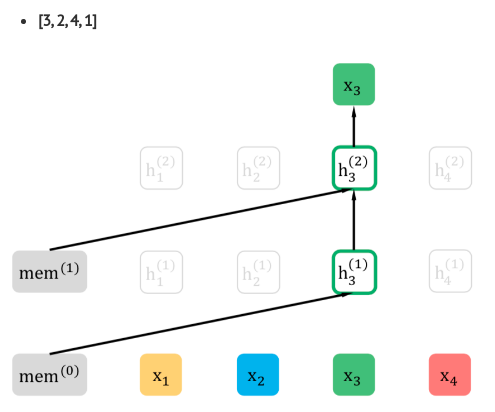

토큰 4개짜리 문장을 랜덤으로 섞은 결과가 [3,2,4,1]이고 셔플된 시퀀스의 첫번째 단어인 3번 토큰을 맞춰야 한다고 가정하자. 3번 토큰 정보를 넣으면 문제가 너무 쉬워지므로 3번 토큰 정보를 넣어서는 안 되고, 2, 4, 1번 토큰은 맞출 토큰 이후에 등장한 단어이므로 입력에서 제외된다. 따라서 입력값은 이전 세그먼트의 메모리 정보뿐이다.

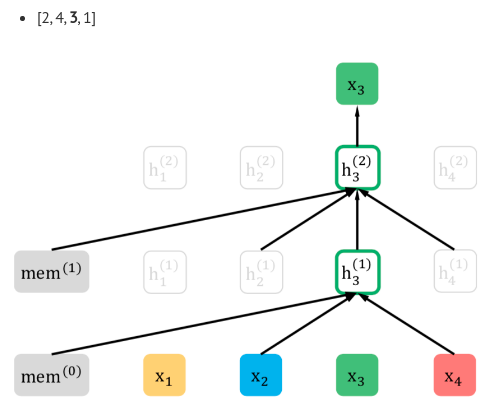

같은 문장을 또 셔플한 결과가 [2,4,3,1]이고 3번 토큰을 예측해야 한다고 가정하자. 그러면 3번 토큰 이전 문맥인 메모리, 2, 4번 단어가 입력된다. 이와 같은 방식으로 퍼뮤테이션 언어 모델은 반복된다. 

- 퍼뮤테이션 언어 모델의 구현

퍼뮤테이션 언어 모델의 실제 구현은 어텐션 마스크로 실현된다. XLNet의 근간이 기존 트랜스포머 네트워크이고, 그 핵심이 쿼리, 키 벡터간 셀프 어텐션 기법이기 때문이다. 

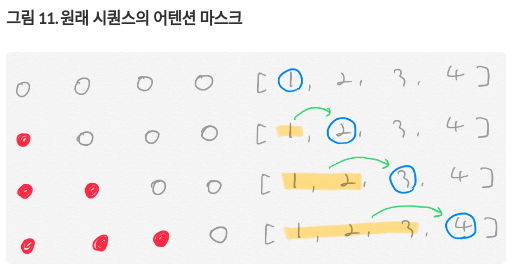

그림 11의 좌측 행렬은 셀프 어텐션을 수행할 때 소프트맥스 확률값에 적용하는 마스크 행렬이다. 여기서 마스크란 소프트맥스 확률값을 0으로 무시하게 하는 역할을 한다는 것이다. 소프트맥스 확률값이 0이 되면 해당 단어의 정보는 셀프 어텐션에 포함되지 않는다. (빈칸인 원이 마스크, 붉은색 원은 확률값이 살아있다.) 마스크 행렬의 행은 쿼리 단어, 열은 키 단어에 대응한다. 토큰 순서대로 예측하면 1번 단어를 예측할 때는 어떤 정보도 사용할 수 없고, 2번 단어를 맞춰야 하면 이전 문맥인 1번 단어 정보를 활용한다. 이런 식으로 학습한다. 

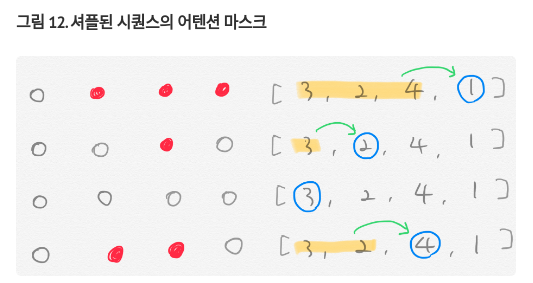

위의 그림은 퍼뮤테이션 언어모델이 사용하는 어텐션 마스크의 예이다. 셔플된 토큰 시퀀스가 [3,2,4,1]라면 3번 단어를 맞춰야 할 때 어떤 정보도 사용할 수 없다. 2번 단어를 예측할 때는 이전 문맥인 3번 단어 정보를 쓴다. 4번 단어를 맞출 때는 3, 2번 단어, 1번 단어를 예측할 때는 3, 2, 4번 단어 정보를 입력한다. 

하지만 퍼뮤테이션 언어 모델에도 단점이 있다. 1-4의 문장을 랜덤 셔플한 결과가 [3,2,4,1[과 [3,2,1,4[이고 이번 단계에서 셔플 시퀀스의 세 번째를 예측한다고 가정하자. 이 경우 모델은 동일한 입력(3, 2번 단어)을 받아 다른 출력을 내야 한다. 

이 문제를 해결하기 위해 투 스트림 어텐션 기법이 제안되었다.

2. 투 스트림 셀프 어텐션 Two-Stream Self Attention

투 스트림 셀프 어텐션은 쿼리 스트림(query stream)과 컨텐트 스트림(content stream)을 혼합한 셀프 어텐션 기법이다. 

1) 컨텐트 스트림    
컨텐트 스트림은 기존 트랜스포머 네트워크와 거의 유사하다. (설명이 길어서 간단히 정리) 
예측할 단어를 계산한다면 이전 문맥(메모리)와 자기 자신의 토큰 임베딩 정보가 계산에 포함된다. (자기 자신의 토큰 정보가 없다면 트랜스포머 블록별로 누적되면서 예측 단어 이후 등장하는 토큰을 예측할 때 예측 단어의 정보를 참고하기 어렵기 때문이다.)

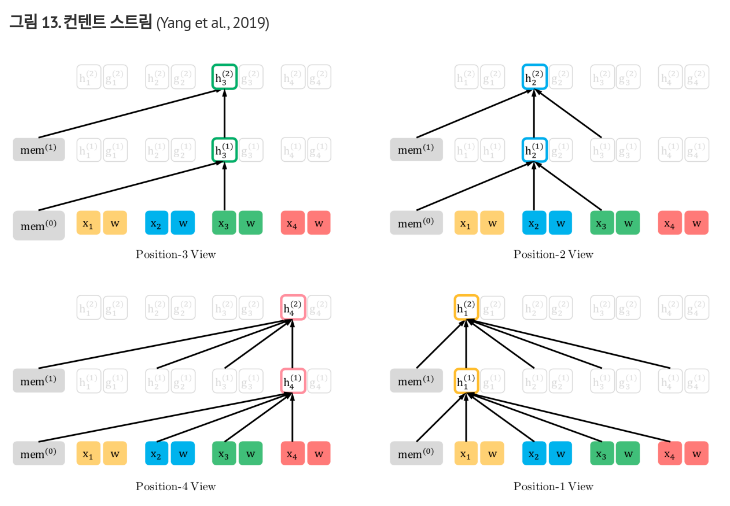

2) 쿼리 스트림     
쿼리 스트림은 토큰과 위치(position) 정보를 활용한 셀프 어텐션 기법이다. 쿼리 스트림을 만들 때는 이전 토큰 정보 뿐 아니라 이번에 맞춰야할 타겟 단어의 위치 정보를 활용한다. 첫 번째 레이어에서 예측 단어의 쿼리 스트림을 구하려면 쿼리, 키, 값이 필요한데, 키와 값은 이전 문맥의 컨텐트 스트림이 되고, 쿼리는 예측 단어의 위치 정보이다. (단어 임베딩 정보=토큰 정보는 제외) 다음 레이어의 쿼리 스트림에서 쿼리는 이전 레이어의 쿼리 스트림이므로 지금 예측해야할 단어의 임베딩 정보는 모델이 볼 수 없다.  

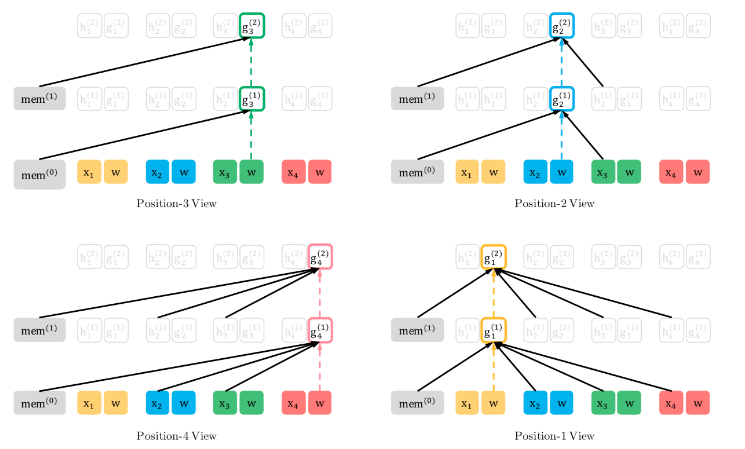

퍼뮤테이션 때문에 모델은 동일한 입력을 받아 다른 출력을 내야 하는 문제를 해결하기 위해 쿼리 스트림이 위와 같이 설계하게 되었다. 

## 15-8. ALBERT(A Lite BERT for Self-supervised Learning of Language Representations)
BERT와 같은 pretrain 모델들이 이제 NLP의 대세이지만 개인의 장비에서 학습시킬 수 없다. ALBERT는 '성능은 유지하면서 메모리는 적게 쓰는 좀 더 가벼운 BERT를 만들 수 없을까?'라는 질문에서부터 시작해 만들어 졌다.

### ALBERT의 구조
ALBERT의 기본 구조는 BERT와 같다. 즉 트랜스포머의 encoder를 기반으로 하며, activation function(활성화 함수)으로는 GELU를 사용한다.

그러나 더 가벼운 BERT를 만들기 위해 ALBERT는 아래의 세 가지 아이디어를 적용한다.

#### 1. Factorized embedding parameterization
BERT는 input의 token embedding(E)과 hidden layer(H)의 size가 같다.(E≡H) 그런데 ALBERT는 E를 H보다 작게 만들어서 parameter의 수를 줄였다. 저자는 BERT와 같은 모델들의 성공 요인 중 하나를 context를 반영한 임베딩에 있다고 이야기한다. 

모델의 입장에서 context를 반영하는 부분은 트랜스포머 layer(hidden layer)를 통과하는 부분이고, token embedding은 context와 무관한, 그저 token을 벡터화한 것일 뿐이다. 따라서 E와 H의 사이즈가 꼭 같을 필요는 없다. H의 사이즈는 클수록 성능이 높아질 가능성이 있지만 E의 사이즈는 줄여도 성능과는 크게 연관이 없다.

BERT에서는 E와 H를 같도록(tying) 모델을 설계했기 때문에 무작정 E, H의 사이즈를 변경할 수 없다. 

BERT에서의 임베딩 벡터는 V * H(혹은 E)의 매트릭스이다. 성능을 위해서 V도 너무 작아서는 안 된다. 또한 V도, H(E)도 커지게 되면 엄청난 수의 parameter들을 가진다. 이는 parameter를 줄이는 방법이 아니다. 

효과적으로 적당한 V를 유지하면서, H는 키우고 E는 줄이는 방법은 __matrix factorization(행렬 분해)__ 이다.

V * H의 매트릭스를 V * E와 E * H의 매트릭스로 나누는 것이다. (추천시스템 등 다양한 분야에서 널리 쓰이고 있는 기법)

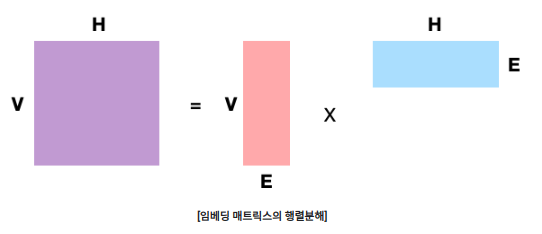

행렬 분해를 통해 H의 사이즈는 유지한 채 E의 사이즈를 줄일 수 있고 parameter의 수도 줄일 수 있다. 

#### 2. Cross-layer parameter sharing
parameter를 공유하는 방법은 parameter의 수를 줄이는 방법 중 하나이다. ALBERT는layer간의 모든 parameter들을 공유한다.


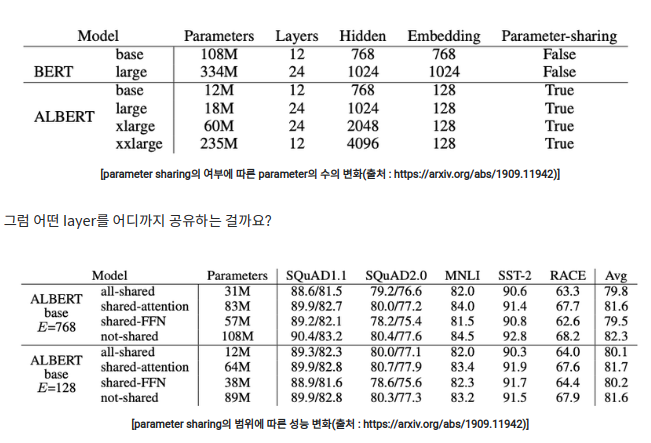

사실 모델이 parameter를 공유한다는 것은 일장일단(trade-off)이 있다. 많은 부분을 공유할수록 모델의 parameter의 수는 줄어들지만(경량화) 성능이 떨어질 우려가 있다. 그럼에도 불구하고 ALBERT는 기본적으로 모든 parameter들을 공유한다. ALBERT는 transformer block 1개를 이용하여 재사용한다.

#### 3. Inter-sentence coherence loss

BERT는 Masked-LM(MLM)와 Next Sentence Prediction(NSP)을 이용하여 model을 pre-train시켰다.

NSP의 경우 실제 이어지는 두 문장(positive)과, 임의로 뽑은 두 문장(negative)(샘플링)을 구분하는 것을 학습하게 된다. 그러나 이렇게 임의로 뽑은 문장은 첫 번째 문장과 두 번째 문장의 topic이 매우 다를 가능성이 있다. 즉 NSP는 두 문장의 연관 관계보다 두 문장의 topic 차이를 구별하는 것에 가까울 수 있다.

ALBERT는 NSP를 삭제하고 이를 Sentence Order Prediction(SOP)로 대체한다. SOP는 실제 두 문장의 순서를 바꾸어 학습 데이터를 만드는 방식이다. 두 문장의 순서가 원래의 데이터의 순서와 일치한다면 positive, 순서가 원래 데이터와 반대로 되어있다면 negative가 된다. 이런 학습을 통해 모델은 기존의 NSP보다 훨씬 더 복잡한 언어적 사이의 연관성(discourse-level coherence properties)을 이해할 수 있게 된다.

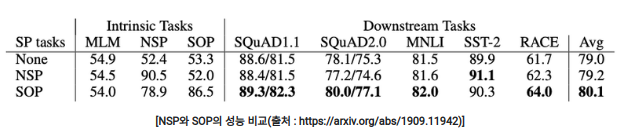

이러한 구조들을 이용하여 ALBERT-xxlarge는 BERT-large의 약 70%의 parameter들을 가지고도 오히려 성능을 개선하였다. 이 밖에도 논문에서는 '같은 시간동안 학습한다면?' 등 다양한 실험들을 통해 여러 시사점을 준다.

TFAlbertEmbeddings의 임베딩 방식과 TFAlbertTransformer 안에서 group 단위로 파라미터가 재사용되는 부분을 주의 깊게 보자. 

- 논문: [ALBERT: A Lite BERT for Self-supervised Learning of Language Representations](https://arxiv.org/abs/1909.11942)